# Python Homework 4

**Due date:** Tuesday, __November 16__, 11:59 p.m. via Gradescope

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename "PythonHW4_YOURPERMNUMBER.ipynb".

Problem 1.

__Background:__ Markov chains could be used to model a plethora of phenomena that happen in our world. The only assumption that we would have to accept is the fact that what we are trying to model depends only on the last step, and not on all previous steps (the whole history). 

For example, Sahin and Sen (2001) model hourly wind speeds in a NW part of Turkey as a Markov chain ${(X_n)}_{n\in \mathbb{N}}$ with 7 states representing different wind speed levels. Since in Python arrays are indexed starting from $0$, let us consider the states to be $S=\{0,1,2,3,4,5,6 \}$, with $0$ representing the lowest wind speed level. The transition matrix is given by: 

\begin{gather*}
P=\begin{array}{cccccccc}
& 0 & 1 & 2 & 3 & 4 & 5 & 6 \\
0 & 0.756 & 0.113 & 0.129 & 0.002 & 0 & 0 & 0\\
1 & 0.174 & 0.821 & 0.004 & 0.001 & 0 & 0 & 0\\
2 & 0.141 & 0.001 & 0.776 & 0.082 & 0 & 0 & 0\\
3 & 0.003 & 0 & 0.192 & 0.753 & 0.052 & 0 & 0\\
4 & 0 & 0 & 0.002 & 0.227 & 0.735 & 0.036 & 0\\
5 & 0 & 0 & 0 & 0.007 & 0.367 & 0.604 & 0.022\\
6 & 0 & 0 & 0 & 0 & 0.053 & 0.158 & 0.789\\
\end{array}
\end{gather*}

As usual, we start with loading some packages:

In [1]:
import numpy as np 
from numpy import linalg 
import scipy.linalg
from numpy import polynomial
import matplotlib
from matplotlib import pyplot
from numpy.linalg import matrix_power

### Part a (2 Points)

Implement the transition probability matrix $P$ from above as a two dimensional <tt>numpy.array()</tt>. Compute $P^{7}$ and list its rows. 

In [2]:
# WRITE YOUR OWN CODE HERE! 
# Use P5 = linalg.matrix_power(P, 7)
P = np.array([[0.756,0.113,0.129,0.002,0,0,0],
              [0.174,0.821,0.004,0.001,0,0,0],
              [0.141,0.001,0.776,0.082,0,0,0],
              [0.003,0,0.192,0.753,0.052,0,0],
              [0,0,0.002,0.227,0.735,0.036,0],
              [0,0,0,0.007,0.367,0.604,0.022],
              [0,0,0,0,0.053,0.158,0.789]])
P7 = linalg.matrix_power(P, 7)
P7

array([[3.88182154e-01, 2.51905218e-01, 2.78526403e-01, 7.35440384e-02,
        7.52157116e-03, 3.14415541e-04, 6.20064088e-06],
       [3.90899834e-01, 4.01123054e-01, 1.73362747e-01, 3.21628973e-02,
        2.37176779e-03, 7.83745082e-05, 1.32548575e-06],
       [3.00702106e-01, 1.17049352e-01, 3.90973627e-01, 1.63754184e-01,
        2.59246983e-02, 1.54837844e-03, 4.76542058e-05],
       [1.81054947e-01, 4.53387029e-02, 3.81778491e-01, 2.98851434e-01,
        8.48801487e-02, 7.68398104e-03, 4.12295300e-04],
       [8.19244208e-02, 1.33620772e-02, 2.68559006e-01, 3.72565981e-01,
        2.27965343e-01, 3.22631333e-02, 3.36003854e-03],
       [3.69181923e-02, 4.14369253e-03, 1.71543120e-01, 3.53122996e-01,
        3.35345550e-01, 7.67724309e-02, 2.21540186e-02],
       [1.11758879e-02, 9.64858223e-04, 6.91427100e-02, 2.08955182e-01,
        3.35675738e-01, 1.67200772e-01, 2.06884851e-01]])

### Part b (4 points)
Assume that the wind speed in State $i$ is $10 \cdot i$ Miles/hr. So there is no wind in state 0 and 60 M/hr wind in state 6. Given that there is no wind today, find the **expected wind speed** in 1 week's time. 

In [3]:
# WRITE YOUR OWN CODE HERE! 
speed = []
for i in range(0,7):
    t = 10*i
    speed.append(t)
np.array(speed)
expected_wind_speed = np.dot(speed,P7[0])
expected_wind_speed

10.612857045656652

### Part c (4 Points)

We fix $X_0 = 0$ (no wind today) and wish to compute $H_n := \mathbb{P}(X_n = 6 | X_0 = 0)$ which is the probability that there will be strong wind $n$ days from now. Using a <tt>for</tt> loop, evaluate $H_n$ for $n=1,2,\ldots,100$, i.e for 1,2, and up to 100 days into the future.

Create a plot showing $H_n$ as a function of $n$. Summarize what you observe.

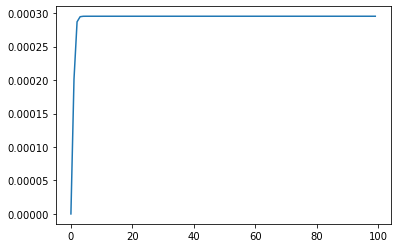

In [4]:
# WRITE YOUR OWN CODE HERE! 
H_n = [] 
for n in range(0,100):
    H = np.linalg.matrix_power(P,24*n)[0][6]
    H_n.append(H)
pyplot.plot(H_n)

### Problem 2.

__Background:__ Markov chains are a powerful tool that can be used to solve many problems in optimization. In particular, there are many algorithms, defined in terms of Markov chains, that can be used to find local or global maxima and minima of functions. 

In this problem we will look at a stochastic approximation method that can be used to estimate the root of a function $h$ (i.e., the point $x$ at which $h(x) = 0$. For simplicity, in this function we will assume that $h$ is a polynomial. 

Our stochastic approximation algorithm see
ks to find the $x_* \in \mathbb{R}$ that minimizes $h$, namely we want to find
$$
x_* = {\arg\min}_x h(x).
$$
Our stochastic approximation algorithm will be defined in terms of a step-size sequence $\{\gamma_n\}$ and a noise sequence $\{\xi_{n}\}$. For each $n \in \mathbb{N}$, let, for an initial condition $x \in \mathbb{R}$,
$$
\begin{cases}
x_{n+1} \doteq x_n -  \gamma_{n+1}( \nabla h(x_n)  + \xi_{n+1}),\\
x_0 = x.
\end{cases}
$$
where $\nabla h(x)$ is the derivative of $h$ evaluated at $x \in \mathbb{R}$.

Typically, in order to ensure that the approximation converges, the step size sequence satisfies
$$
\sum\limits_{n=1}^{\infty} \gamma_n =\infty, \qquad \text{ and }\sum\limits_{n=1}^{\infty} \gamma_n^2 < \infty.
$$
For example, if $\gamma_n = \frac{\gamma_*}{n}$ for some constant $\gamma_* > 0$, then these conditions are satisfied.

In general one requires certain conditions on the function $h$ (e.g., it is differentiable and has a unique minimum) and the noise sequence $\{\xi_n\}$.

In this problem we will assume that $\{\xi_n\}$ is an i.i.d. collection of random variables.

### (a) (3 points)

We begin by considering the case when our approximation method is purely deterministic, namely $\xi_n = 0$ for each $n \in \mathbb{N}$ (see https://en.wikipedia.org/wiki/Euler_method). We assume that the step-size sequence is given by $\gamma_n = \frac{0.05}{n}$.

We also assume that $h$ is a $d$-dimensional polynomial, namely $h$ is of the form
$$
h(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_d x^d.
$$
Write a function __1. Function:__ <tt>Euler(...)</tt>

Input: 
* <tt>h</tt>: coefficients of the polynomial h: $[a_d, a_{d-1},\dots,a_1, a_0]$ (array of length $d + 1$)
* <tt>n</tt>: number of steps for which the approximation will be ran.
* <tt>x</tt>: the initial condition of the approximation (so that $x_0 = x$).

Output:
* <tt>result</tt>: the approximation at each time instant, namely $[x_{n}, x_{n-1}, x_{n-2}, \dots, x_1, x_0]$ (array of length n+1)


In [5]:
def Euler(h, x, n):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.where() AND numpy.amax()
    ## HINT: USE numpy.polyder() to calculate the derivative of h
    ## HINT: USE numpy.polyval to evaluate the derivative of h at x
    result = []
    for i in range(1,n+1):
        x = x - (np.polyval(np.polyder(h),x))*(0.05/(i+1))
        result += [x]
    result.reverse()
    return result  

### (b) (3 points)

Consider the polynomial $h$ given by 
$$
h(x) = x^4 - 9x^3 + 26x^2 - 24x + 6.9141
$$

Using your function from part (a), approximate the root of $h$ with $n = 100$ with initial conditions $x = -1, 0,1,4$. How far is your approximation from the actual minimizer (which occurs at $x = 0.67365$)?

What is your approximation algorithm converging to when it is initialized at $x = 4$? Why might this be? It may be helpful to plot the function $h$.

In [6]:
print("the root of  ℎ  with  𝑛=100  with initial conditions x= ",-1," is ",Euler([1,-9,26,-24,6.9141],-1,100)[99],", and is ",abs(0.67365-Euler([1,-9,26,-24,6.9141],-1,100)[99])," from actual minimizer")
print("the root of  ℎ  with  𝑛=100  with initial conditions x= ",0," is ",Euler([1,-9,26,-24,6.9141],0,100)[99],", and is ",abs(0.67365-Euler([1,-9,26,-24,6.9141],0,100)[99])," from actual minimizer")
print("the root of  ℎ  with  𝑛=100  with initial conditions x= ",1," is ",Euler([1,-9,26,-24,6.9141],1,100)[99],", and is ",abs(0.67365-Euler([1,-9,26,-24,6.9141],1,100)[99])," from actual minimizer")
print("the root of  ℎ  with  𝑛=100  with initial conditions x= ",4," is ",Euler([1,-9,26,-24,6.9141],4,100)[99],", and is ",abs(0.67365-Euler([1,-9,26,-24,6.9141],4,100)[99])," from actual minimizer")

the root of  ℎ  with  𝑛=100  with initial conditions x=  -1  is  1.6750000000000003 , and is  1.0013500000000004  from actual minimizer
the root of  ℎ  with  𝑛=100  with initial conditions x=  0  is  0.6000000000000001 , and is  0.07364999999999988  from actual minimizer
the root of  ℎ  with  𝑛=100  with initial conditions x=  1  is  0.875 , and is  0.20135000000000003  from actual minimizer
the root of  ℎ  with  𝑛=100  with initial conditions x=  4  is  3.8 , and is  3.12635  from actual minimizer


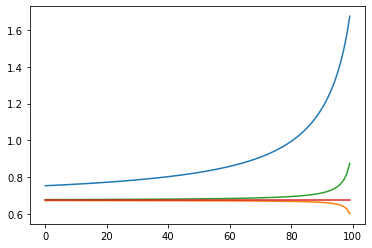

In [7]:
pyplot.plot(Euler([1,-9,26,-24,6.9141],-1,100))
pyplot.plot(Euler([1,-9,26,-24,6.9141],0,100))
pyplot.plot(Euler([1,-9,26,-24,6.9141],1,100))
pyplot.plot([0.67365]*100)

In [8]:
# The algorithm convering to 3.169 when x=4 since h has a local miniumn which is 3.6

### (c) (3 points)

We now consider the case when the noise term is normally distributed, in particular when $\xi_n$ are i.i.d. $\mathcal{N}(0,\sigma^2)$ random variables. Write a function 

__Function:__ <tt>SA(...)</tt>

Input: 
* <tt>h</tt>: coefficients of the polynomial h: $[a_d, a_{d-1},\dots,a_1, a_0]$ (array of length $d + 1$)
* <tt>n</tt>: number of steps for which the approximation will be ran.
* <tt>x</tt>: the initial condition of the approximation (so that $x_0 = x$).
* <tt>var</tt>: the variance of the noise term, $\sigma^2$.

Output:
* <tt>result</tt>: the approximation at each time instant, namely $[x_{n}, x_{n-1}, x_{n-2}, \dots, x_1, x_0]$ (array of length n+1).

In [9]:
def SA(h, x, n, var):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.where() AND numpy.amax()
    ## HINT: USE numpy.polyder() to calculate the derivative of h
    ## HINT: USE numpy.polyval to evaluate the derivative of h at x
    result = []
    for i in range(1,n+1):
        x = x - (0.05/(i+1))*(np.polyval(np.polyder(h),x)+np.random.normal(0,np.sqrt(var)))
        result += [x]
    result.reverse()
    return result  

### (d) (3 points)

Now consider the same polynomial $h$ from part (b). This time we will update our approximation by letting $\xi_n$ be i.i.d. $\mathcal{N}(0,5)$ random variables. Using your function from part (a), approximate the root of $h$ with $n = 100$ with initial conditions $x = -1, 0,1,4$. How far is your approximation from the actual minimizer (which occurs at $x = 0.67365$)? Does the presence of a noise term seem to affect the convergence properties of the algorithm?

Repeat this when $\sigma^2 = 50$ and comment on your results. What seems to happen when the noise term is "too large"?

In [10]:
print("the 100th term for x0 = ",-1," is ",SA([1,-9,26,-24,6.9141],-1,100,5)[99],", and is ",abs(0.67365-SA([1,-9,26,-24,6.9141],-1,100,5)[99])," from actual minimizer")
print("the 100th term for x0 = ",0," is ",SA([1,-9,26,-24,6.9141],0,100,5)[99],", and is ",abs(0.67365-SA([1,-9,26,-24,6.9141],0,100,5)[99])," from actual minimizer")
print("the 100th term for x0 = ",1," is ",SA([1,-9,26,-24,6.9141],1,100,5)[99],", and is ",abs(0.67365-SA([1,-9,26,-24,6.9141],1,100,5)[99])," from actual minimizer")
print("the 100th term for x0 = ",4," is ",SA([1,-9,26,-24,6.9141],4,100,5)[99],", and is ",abs(0.67365-SA([1,-9,26,-24,6.9141],4,100,5)[99])," from actual minimizer")

the 100th term for x0 =  -1  is  1.644653171360257 , and is  0.9840216745241536  from actual minimizer
the 100th term for x0 =  0  is  0.6254148737834195 , and is  0.08780841063643785  from actual minimizer
the 100th term for x0 =  1  is  0.8956142918617954 , and is  0.244377524965819  from actual minimizer
the 100th term for x0 =  4  is  3.83136324976085 , and is  3.1355826871076657  from actual minimizer


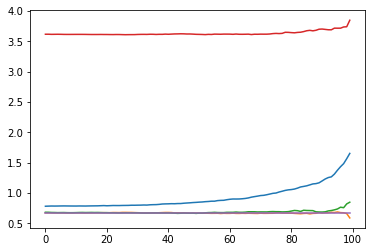

In [11]:
pyplot.plot(SA([1,-9,26,-24,6.9141],-1,100,5))
pyplot.plot(SA([1,-9,26,-24,6.9141],0,100,5))
pyplot.plot(SA([1,-9,26,-24,6.9141],1,100,5))
pyplot.plot(SA([1,-9,26,-24,6.9141],4,100,5))
pyplot.plot([0.67365]*100)

In [12]:
print("the 100th term for x0 = ",-1," is ",SA([1,-9,26,-24,6.9141],-1,100,50)[99],", and is ",abs(0.67365-SA([1,-9,26,-24,6.9141],-1,100,50)[99])," from actual minimizer")
print("the 100th term for x0 = ",0," is ",SA([1,-9,26,-24,6.9141],0,100,50)[99],", and is ",abs(0.67365-SA([1,-9,26,-24,6.9141],0,100,50)[99])," from actual minimizer")
print("the 100th term for x0 = ",1," is ",SA([1,-9,26,-24,6.9141],1,100,50)[99],", and is ",abs(0.67365-SA([1,-9,26,-24,6.9141],1,100,50)[99])," from actual minimizer")
print("the 100th term for x0 = ",4," is ",SA([1,-9,26,-24,6.9141],4,100,50)[99],", and is ",abs(0.67365-SA([1,-9,26,-24,6.9141],4,100,50)[99])," from actual minimizer")

the 100th term for x0 =  -1  is  1.8941770639342304 , and is  0.8148399949021846  from actual minimizer
the 100th term for x0 =  0  is  0.5469086688167736 , and is  0.1258773608704863  from actual minimizer
the 100th term for x0 =  1  is  0.9976139539629215 , and is  0.22062529474594827  from actual minimizer
the 100th term for x0 =  4  is  4.025658371423326 , and is  3.1360225978585095  from actual minimizer


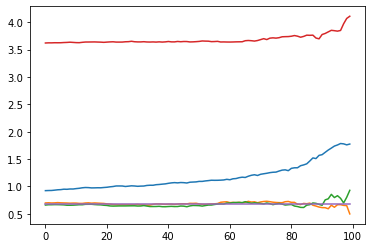

In [13]:
pyplot.plot(SA([1,-9,26,-24,6.9141],-1,100,50))
pyplot.plot(SA([1,-9,26,-24,6.9141],0,100,50))
pyplot.plot(SA([1,-9,26,-24,6.9141],1,100,50))
pyplot.plot(SA([1,-9,26,-24,6.9141],4,100,50))
pyplot.plot([0.67365]*100)

In [14]:
# The noise term can help us see the converage and find the mininum by using sigma 

In [15]:
# The converage is sooner if we have high sigma.